In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

# EDA - Human activity recognition

In [86]:
# Each of the data-files contains 54 columns per row, the columns contain the following data:
# – 1 timestamp (s)
# – 2 activityID (see II.2. for the mapping to the activities)
# – 3 heart rate (bpm)
# – 4-20 IMU chest
# – 21-37 IMU chest
# – 38-54 IMU ankle
# The IMU sensory data contains the following columns:
# – 1 temperature (°C)
# – 2-4 3D-acceleration data (ms-2), scale: ±16g, resolution: 13-bit    **recommended to use  
# – 5-7 3D-acceleration data (ms-2), scale: ±6g, resolution: 13-bit*
# – 8-10 3D-gyroscope data (rad/s)
# – 11-13 3D-magnetometer data (μT)
# – 14-17 orientation (invalid in this data collection)

# Activity IDs:
# – 1 lying
# – 2 sitting
# – 3 standing
# – 4 walking
# – 5 running
# – 6 cycling
# – 7 Nordic walking
# – 9 watching TV
# – 10 computer work
# – 11 car driving
# – 12 ascending stairs
# – 13 descending stairs
# – 16 vacuum cleaning
# – 17 ironing
# – 18 folding laundry
# – 19 house cleaning
# – 20 playing soccer
# – 24 rope jumping
# – 0 other (transient activities)

In [2]:
number_to_activity ={ 
        '0': 'other'
        ,'1': 'lying'
        ,'2': 'sitting'
        ,'3': 'standing'
        ,'4': 'walking'
        ,'5': 'running'
        ,'6': 'cycling'
        ,'7': 'Nordic walking'
        ,'9': 'watching TV'
        ,'10':'computer work'
        ,'11':'car driving'
        ,'12':'ascending stairs'
        ,'13':'descending stairs'
        ,'16':'vacuum cleaning'
        ,'17':'ironing'
        ,'18':'folding laundry'
        ,'19':'house cleaning'
        ,'20':'playing soccer'
        ,'24':'rope jumping'
        }
activity_to_number ={ 
         'other':'0' 
        ,'lying':'1' 
        ,'sitting':'2' 
        ,'standing':'3' 
        ,'walking':'4' 
        ,'running':'5' 
        ,'cycling':'6' 
        ,'Nordic walking':'7' 
        ,'watching TV':'9' 
        ,'computer work':'10'
        ,'car driving':'11' 
        ,'ascending stairs':'12' 
        ,'descending stairs':'13' 
        ,'vacuum cleaning':'16' 
        ,'ironing':'17' 
        ,'folding laundry':'18' 
        ,'house cleaning':'19' 
        ,'playing soccer':'20' 
        ,'rope jumping':'24' 
        }


In [7]:
df_102 = pd.read_csv('Protocol\subject102.dat')
df_102

,5.64 0 NaN 33 2.79143 7.55389 -7.06374 2.87553 7.88823 -6.76139 1.0164 -0.28941 1.38207 -11.6508 -3.73683 31.1784 1 0 0 0 36.125 1.94739 9.59644 -3.12873 1.81868 9.49711 -2.91989 0.124025 0.112482 -0.0449469 -20.2905 -32.0492 8.67906 1 0 0 0 33.8125 9.84408 -0.808951 -1.64674 9.73055 -0.846832 -1.29665 -0.027148 -0.0311901 -0.0408973 -47.7695 -2.58701 59.8481 -0.0128709 0.747947 -0.0798406 0.658813
0,5.65 0 NaN 33 2.86086 7.43814 -7.21626 2.84248...
1,5.66 0 100 33 2.80997 7.0943 -7.52376 2.79373 ...
2,5.67 0 NaN 33 2.77138 6.98077 -7.52396 2.80627...
3,5.68 0 NaN 33 2.7671 7.13119 -7.67848 2.78766 ...
4,5.69 0 NaN 33 2.60926 7.13068 -7.87328 2.8163 ...
...,...
446994,4475.59 0 NaN 29.125 -0.0408284 -0.0507652 9.7...
446995,4475.6 0 NaN 29.125 -0.00410941 -0.0134532 9.7...
446996,4475.61 0 NaN 29.125 -0.0730027 -0.0111924 9.9...
446997,4475.62 0 NaN 29.125 0.18965 0.0999117 9.85688...


In [8]:
data = df_102.iloc[0][0].split(' ')

In [9]:
data

['5.65',
 '0',
 'NaN',
 '33',
 '2.86086',
 '7.43814',
 '-7.21626',
 '2.84248',
 '7.63164',
 '-6.8514',
 '1.08269',
 '-0.393965',
 '1.60935',
 '-11.6575',
 '-3.18648',
 '30.7215',
 '1',
 '0',
 '0',
 '0',
 '36.125',
 '1.7512',
 '9.6334',
 '-3.32601',
 '1.74445',
 '9.69355',
 '-2.96421',
 '0.132679',
 '0.0608292',
 '-0.0441676',
 '-20.6409',
 '-31.6989',
 '8.30648',
 '1',
 '0',
 '0',
 '0',
 '33.8125',
 '9.83968',
 '-0.807666',
 '-1.80115',
 '9.73049',
 '-0.816601',
 '-1.31189',
 '0.0128035',
 '-0.0363842',
 '-0.0148455',
 '-47.7624',
 '-2.81438',
 '60.3407',
 '0.0140248',
 '-0.74841',
 '0.0790426',
 '-0.65836']

In [10]:
print(f'timestamp(s): {data[0]}')
print(f'activity ID: {data[1]}')    
print(f'Heart rate: {data[2]}')
print(f'3D-acceleration data (ms-2), scale: ±16g, resolution: 13-bit" {data[37:][1:4]}')    
print(f'3D-acceleration data (ms-2), scale: ±6g, resolution: 13-bit*: {data[37:][4:7]} ')
print(f'3D-gyroscope data (rad/s): {data[37:][7:10]}')
print(f'3D-magnetometer data (μT): {data[37:][10:13]}')
print(f'orientation (invalid in this data collection): {data[37:][13:17]}')


timestamp(s): 5.65
activity ID: 0
Heart rate: NaN
3D-acceleration data (ms-2), scale: ±16g, resolution: 13-bit" ['9.83968', '-0.807666', '-1.80115']
3D-acceleration data (ms-2), scale: ±6g, resolution: 13-bit*: ['9.73049', '-0.816601', '-1.31189'] 
3D-gyroscope data (rad/s): ['0.0128035', '-0.0363842', '-0.0148455']
3D-magnetometer data (μT): ['-47.7624', '-2.81438', '60.3407']
orientation (invalid in this data collection): ['0.0140248', '-0.74841', '0.0790426', '-0.65836']


In [11]:
def read_data_and_preprocessing():
    data ={}
    columns_name = [
    'timestamp','activityID', 'heart-rate',
    # IMU hand
    'hand-temperature',
    'hand-acc-x','hand-acc-y', 'hand-acc-z', 
    'hand-x6','hand-y6', 'hand-z6',
    'hand-gyr-x','hand-gyr-y', 'hand-gyr-z',
    'hand-mag-x','hand-mag-y', 'hand-mag-z',
    # IMU chest 
    'chest-temperature',
    'chest-acc-x','chest-acc-y', 'chest-acc-z', 
    'chest-x6','chest-y6', 'chest-z6',
    'chest-gyr-x','chest-gyr-y', 'chest-gyr-z',
    'chest-mag-x','chest-mag-y', 'chest-mag-z',
    # IMU ankle
    'ankle-temperature',
    'ankle-acc-x','ankle-acc-y', 'ankle-acc-z', 
    'ankle-x6','ankle-y6', 'ankle-z6',
    'ankle-gyr-x','ankle-gyr-y', 'ankle-gyr-z',
    'ankle-mag-x','ankle-mag-y', 'ankle-mag-z']
    
    for subject_number in range(101,110):
        datContent = [i.split() for i in open(f'Protocol\subject{subject_number}.dat').readlines()] #Reading the date 
        # drop out orientation from all IMU sensors
        # data[3:17] #IMU chest data without orientation 
        # data[20:34] #IMU chest data without orientation 
        # data[37:51]  #IMU ankle data without orientation 
        datContent = [np.concatenate((row[:16],row[20:33],row[37:50])) for row in datContent]
        df = pd.DataFrame(datContent, columns=columns_name)
        # transform all columns from str to numeric
        for col in df.columns:
            df[col] = pd.to_numeric(df[col], errors='coerce')
        
        df = df.drop(columns=['hand-x6','hand-y6', 'hand-z6','chest-x6','chest-y6', 'chest-z6','ankle-x6','ankle-y6', 'ankle-z6'])
        
        data[subject_number] = df   # add subject's dataframe to dictionary  
        
    return data

In [12]:
subjects_data = read_data_and_preprocessing()

In [14]:
def barh_plot_activity(df, subject_number):
    d = df.activityID.value_counts(normalize=True)
    y = d.values
    x = d.index
    activities = [number_to_activity[str(i)] for i in x]
    plt.figure(figsize = (8, 5))
    # creating the bar plot
    plt.barh(activities , y, color ='maroon')
    plt.ylabel("activity name")
    plt.xlabel("percentage of subject recorded time")
    plt.title(f"The ratio of each activity of a subject {subject_number}")
    # Add x, y gridlines
    plt.grid(visible = True, color ='grey',linestyle ='-.', linewidth = 0.5,alpha = 0.2)
    plt.show()

In [15]:
df_2 = subjects_data[102]

subject 101 dataframe details:


,timestamp,activityID,heart-rate,hand-temperature,hand-acc-x,hand-acc-y,hand-acc-z,hand-gyr-x,hand-gyr-y,hand-gyr-z,...,ankle-temperature,ankle-acc-x,ankle-acc-y,ankle-acc-z,ankle-gyr-x,ankle-gyr-y,ankle-gyr-z,ankle-mag-x,ankle-mag-y,ankle-mag-z
count,376417.000000,376417.000000,34389.000000,374963.000000,374963.000000,374963.000000,374963.000000,374963.000000,374963.000000,374963.000000,...,375090.000000,375090.000000,375090.000000,375090.000000,375090.000000,375090.000000,375090.000000,375090.000000,375090.000000,375090.000000
mean,1890.460000,5.525765,124.135479,32.429895,-3.349118,6.278528,3.407735,0.032741,0.046213,0.002308,...,33.793903,9.413902,0.345152,-2.194919,-0.000110,0.000361,0.013872,-50.873072,-4.103087,10.433775
std,1086.623725,6.617002,24.000340,1.236379,6.365465,5.196436,3.383241,1.072581,0.870798,1.654828,...,0.969374,5.868752,7.443008,3.720882,0.996037,0.603546,1.786058,25.724727,30.615311,29.524187
min,8.380000,0.000000,78.000000,30.000000,-127.649000,-81.234400,-34.124800,-11.259100,-22.212700,-10.608800,...,30.312500,-49.507200,-155.356000,-133.640000,-11.688700,-7.807450,-11.619400,-172.865000,-137.908000,-109.289000
25%,949.420000,0.000000,104.000000,31.437500,-7.840210,3.591230,1.502020,-0.344787,-0.218379,-0.340880,...,33.187500,8.893663,-2.067800,-3.354192,-0.190940,-0.047853,-0.308403,-63.485375,-28.488200,-9.834780
50%,1890.460000,3.000000,125.000000,32.812500,-2.982460,6.009140,3.464280,-0.001522,0.008506,-0.005281,...,34.000000,9.624330,-0.177941,-1.733430,-0.001233,0.003658,-0.002747,-53.249850,-5.071440,11.097900
75%,2831.500000,7.000000,136.000000,33.500000,1.669090,8.621120,5.551850,0.340209,0.287393,0.339454,...,34.687500,10.000600,1.997383,-0.523223,0.067853,0.168119,0.057149,-36.340800,20.731550,33.179775
max,3772.540000,24.000000,183.000000,33.875000,26.145800,106.898000,132.295000,16.483800,8.666640,9.998620,...,35.000000,149.718000,155.960000,83.884500,13.142500,6.410380,9.377020,97.525500,123.306000,124.806000


percentage of na values:


timestamp            0.000000
activityID           0.000000
heart-rate           0.908641
hand-temperature     0.003863
hand-acc-x           0.003863
hand-acc-y           0.003863
hand-acc-z           0.003863
hand-gyr-x           0.003863
hand-gyr-y           0.003863
hand-gyr-z           0.003863
hand-mag-x           0.003863
hand-mag-y           0.003863
hand-mag-z           0.003863
chest-temperature    0.001352
chest-acc-x          0.001352
chest-acc-y          0.001352
chest-acc-z          0.001352
chest-gyr-x          0.001352
chest-gyr-y          0.001352
chest-gyr-z          0.001352
chest-mag-x          0.001352
chest-mag-y          0.001352
chest-mag-z          0.001352
ankle-temperature    0.003525
ankle-acc-x          0.003525
ankle-acc-y          0.003525
ankle-acc-z          0.003525
ankle-gyr-x          0.003525
ankle-gyr-y          0.003525
ankle-gyr-z          0.003525
ankle-mag-x          0.003525
ankle-mag-y          0.003525
ankle-mag-z          0.003525
dtype: flo

activity histogram:


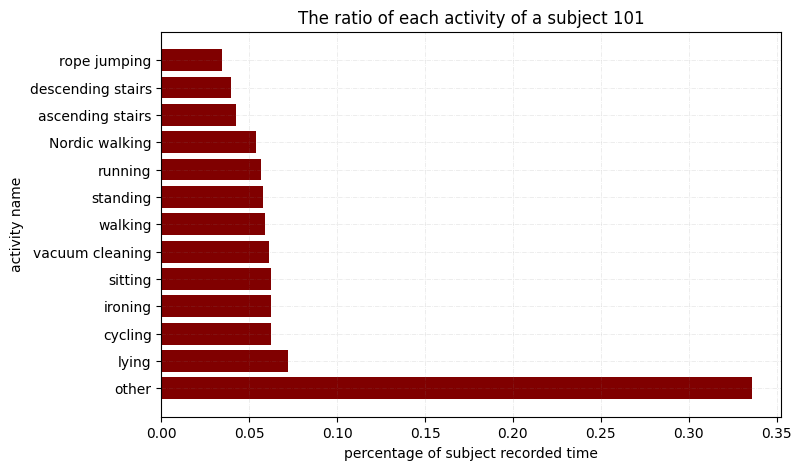

subject 102 dataframe details:


,timestamp,activityID,heart-rate,hand-temperature,hand-acc-x,hand-acc-y,hand-acc-z,hand-gyr-x,hand-gyr-y,hand-gyr-z,...,ankle-temperature,ankle-acc-x,ankle-acc-y,ankle-acc-z,ankle-gyr-x,ankle-gyr-y,ankle-gyr-z,ankle-mag-x,ankle-mag-y,ankle-mag-z
count,447000.000000,447000.000000,40795.000000,444271.000000,444271.000000,444271.000000,444271.000000,444271.000000,444271.000000,444271.000000,...,444555.000000,444555.000000,444555.000000,444555.000000,444555.000000,444555.000000,444555.000000,444555.000000,444555.000000,444555.000000
mean,2240.635000,4.979955,110.744528,32.251913,-5.066690,4.720051,2.238075,0.025114,0.042720,-0.007822,...,34.132319,9.657814,-0.894160,-1.408111,-0.020898,-0.049982,0.002726,-30.201112,3.699441,18.656091
std,1290.379295,6.471130,22.365414,2.102941,5.958017,3.848774,4.217344,1.608742,1.011712,1.630682,...,1.507416,5.394504,6.257366,3.306024,1.050285,0.610318,1.787519,15.220718,17.648637,20.429621
min,5.640000,0.000000,74.000000,27.437500,-70.948400,-50.029900,-38.217400,-21.982400,-18.196800,-16.699700,...,29.500000,-52.498400,-155.024000,-125.071000,-10.541900,-13.040100,-11.746300,-103.775000,-65.339200,-70.650100
25%,1123.137500,0.000000,93.000000,30.437500,-9.128870,2.595720,0.283249,-0.348251,-0.222926,-0.413996,...,34.125000,9.321595,-2.180820,-2.372515,-0.185668,-0.067760,-0.377149,-40.381950,-8.710655,4.583705
50%,2240.635000,2.000000,109.000000,33.062500,-6.700130,4.306010,1.946720,-0.001496,0.006925,-0.007426,...,34.687500,9.657880,-1.378410,-1.511930,0.000367,-0.005699,-0.005756,-33.396400,3.949290,20.325500
75%,3358.132500,7.000000,125.000000,34.125000,-1.077380,6.602405,5.348865,0.406936,0.241824,0.270562,...,35.062500,10.051500,-0.027918,-0.620758,0.091894,0.100946,0.052008,-18.838600,16.821900,35.452400
max,4475.630000,24.000000,179.000000,34.625000,62.859600,105.780000,120.116000,22.766900,16.983500,11.793700,...,35.437500,152.558000,155.996000,88.562700,16.442700,13.163500,11.715800,46.562000,71.031200,146.900000


percentage of na values:


timestamp            0.000000
activityID           0.000000
heart-rate           0.908736
hand-temperature     0.006105
hand-acc-x           0.006105
hand-acc-y           0.006105
hand-acc-z           0.006105
hand-gyr-x           0.006105
hand-gyr-y           0.006105
hand-gyr-z           0.006105
hand-mag-x           0.006105
hand-mag-y           0.006105
hand-mag-z           0.006105
chest-temperature    0.000866
chest-acc-x          0.000866
chest-acc-y          0.000866
chest-acc-z          0.000866
chest-gyr-x          0.000866
chest-gyr-y          0.000866
chest-gyr-z          0.000866
chest-mag-x          0.000866
chest-mag-y          0.000866
chest-mag-z          0.000866
ankle-temperature    0.005470
ankle-acc-x          0.005470
ankle-acc-y          0.005470
ankle-acc-z          0.005470
ankle-gyr-x          0.005470
ankle-gyr-y          0.005470
ankle-gyr-z          0.005470
ankle-mag-x          0.005470
ankle-mag-y          0.005470
ankle-mag-z          0.005470
dtype: flo

activity histogram:


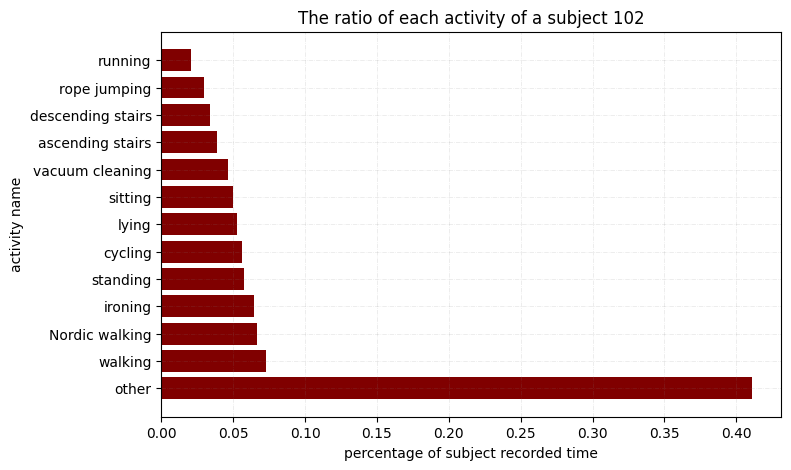

subject 103 dataframe details:


,timestamp,activityID,heart-rate,hand-temperature,hand-acc-x,hand-acc-y,hand-acc-z,hand-gyr-x,hand-gyr-y,hand-gyr-z,...,ankle-temperature,ankle-acc-x,ankle-acc-y,ankle-acc-z,ankle-gyr-x,ankle-gyr-y,ankle-gyr-z,ankle-mag-x,ankle-mag-y,ankle-mag-z
count,252833.000000,252833.000000,23096.000000,252311.000000,252311.000000,252311.000000,252311.000000,252311.000000,252311.000000,252311.000000,...,252306.000000,252306.000000,252306.000000,252306.000000,252306.000000,252306.000000,252306.000000,252306.000000,252306.000000,252306.000000
mean,1269.800000,5.463397,97.359803,31.697408,-4.680230,4.705756,3.257324,-0.001839,-0.023517,-0.040533,...,33.454625,9.492918,-0.595684,-1.483454,-0.007258,-0.033156,0.026294,-25.531251,2.270606,18.105024
std,729.867446,6.476542,21.541463,1.190222,5.968184,3.632959,3.624717,1.363952,0.979723,1.446648,...,1.178249,4.899606,6.376451,3.743491,0.908358,0.522186,1.577181,15.266545,15.938934,16.299567
min,5.640000,0.000000,68.000000,28.062500,-44.881000,-30.282000,-27.224800,-19.582800,-5.820080,-12.706000,...,29.500000,-37.221000,-86.788300,-158.926000,-9.240700,-4.345720,-6.541400,-105.243000,-82.569900,-51.671000
25%,637.720000,0.000000,81.000000,31.250000,-8.951240,2.570465,0.910057,-0.330881,-0.212771,-0.192732,...,32.812500,9.266565,-1.649635,-2.226350,-0.075364,-0.124152,-0.154018,-36.710675,-5.657535,9.567550
50%,1269.800000,2.000000,90.000000,31.812500,-4.963620,4.498200,3.188780,-0.006142,0.010464,-0.003871,...,33.875000,9.737760,-0.012980,-1.111670,0.007328,-0.009705,-0.002323,-24.942350,-0.444829,20.087050
75%,1901.880000,13.000000,117.000000,32.625000,-0.906465,7.566805,6.176330,0.355070,0.223553,0.232190,...,34.437500,9.913877,0.670692,0.081292,0.052586,0.032337,0.033589,-13.744500,16.246600,28.701000
max,2533.960000,17.000000,156.000000,33.250000,21.033200,82.696500,44.052800,18.462500,8.657590,9.327110,...,34.625000,155.166000,156.190000,92.595800,11.223100,5.431100,8.551940,58.894900,69.687000,91.796900


percentage of na values:


timestamp            0.000000
activityID           0.000000
heart-rate           0.908651
hand-temperature     0.002065
hand-acc-x           0.002065
hand-acc-y           0.002065
hand-acc-z           0.002065
hand-gyr-x           0.002065
hand-gyr-y           0.002065
hand-gyr-z           0.002065
hand-mag-x           0.002065
hand-mag-y           0.002065
hand-mag-z           0.002065
chest-temperature    0.000724
chest-acc-x          0.000724
chest-acc-y          0.000724
chest-acc-z          0.000724
chest-gyr-x          0.000724
chest-gyr-y          0.000724
chest-gyr-z          0.000724
chest-mag-x          0.000724
chest-mag-y          0.000724
chest-mag-z          0.000724
ankle-temperature    0.002084
ankle-acc-x          0.002084
ankle-acc-y          0.002084
ankle-acc-z          0.002084
ankle-gyr-x          0.002084
ankle-gyr-y          0.002084
ankle-gyr-z          0.002084
ankle-mag-x          0.002084
ankle-mag-y          0.002084
ankle-mag-z          0.002084
dtype: flo

activity histogram:


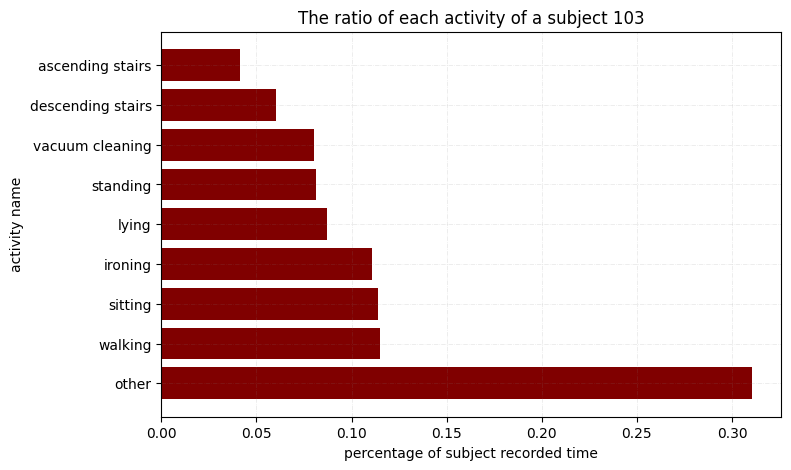

subject 104 dataframe details:


,timestamp,activityID,heart-rate,hand-temperature,hand-acc-x,hand-acc-y,hand-acc-z,hand-gyr-x,hand-gyr-y,hand-gyr-z,...,ankle-temperature,ankle-acc-x,ankle-acc-y,ankle-acc-z,ankle-gyr-x,ankle-gyr-y,ankle-gyr-z,ankle-mag-x,ankle-mag-y,ankle-mag-z
count,329576.000000,329576.000000,30115.000000,327362.000000,327362.000000,327362.000000,327362.000000,327362.000000,327362.000000,327362.000000,...,328475.000000,328475.000000,328475.000000,328475.000000,328475.000000,328475.000000,328475.000000,328475.000000,328475.000000,328475.000000
mean,1653.585000,5.268427,112.915989,31.800364,-6.061583,3.683114,3.563609,-0.024392,0.016033,-0.004695,...,33.519357,9.586647,0.946208,-1.834541,0.018978,-0.047424,0.011870,-31.191721,-2.850653,16.543794
std,951.405405,5.789789,19.564177,1.797355,4.621688,3.321750,3.821756,1.203814,0.709974,0.999285,...,0.515424,4.083202,5.575805,2.400289,0.967636,0.332270,1.576972,19.664968,19.721004,19.124311
min,5.710000,0.000000,57.000000,27.437500,-69.629800,-43.359300,-46.435600,-19.690500,-7.609010,-9.431420,...,32.250000,-19.307100,-74.452700,-47.113600,-7.790290,-3.486750,-6.346780,-99.271600,-75.187700,-59.771300
25%,829.647500,0.000000,105.000000,30.375000,-9.069057,1.632667,1.822407,-0.342244,-0.165669,-0.206869,...,33.062500,9.184020,-0.144020,-2.879635,-0.147975,-0.084380,-0.281621,-43.019150,-15.430800,3.638400
50%,1653.585000,3.000000,113.000000,32.562500,-7.019200,3.473230,3.402360,-0.008386,0.004040,-0.004022,...,33.500000,9.556610,0.848587,-1.929130,-0.000926,-0.007725,-0.003052,-33.927900,-3.106010,19.799700
75%,2477.522500,7.000000,124.000000,33.062500,-3.631182,5.851020,6.676325,0.203446,0.220174,0.240833,...,33.875000,9.958900,2.257200,-0.668381,0.056710,0.038983,0.040815,-18.870950,13.188100,29.373600
max,3301.460000,17.000000,161.000000,33.750000,16.296200,78.481300,56.856400,26.259100,10.071800,9.010740,...,34.437500,71.566100,86.726100,53.549000,9.910960,3.921670,6.698660,57.492700,74.642000,104.093000


percentage of na values:


timestamp            0.000000
activityID           0.000000
heart-rate           0.908625
hand-temperature     0.006718
hand-acc-x           0.006718
hand-acc-y           0.006718
hand-acc-z           0.006718
hand-gyr-x           0.006718
hand-gyr-y           0.006718
hand-gyr-z           0.006718
hand-mag-x           0.006718
hand-mag-y           0.006718
hand-mag-z           0.006718
chest-temperature    0.000646
chest-acc-x          0.000646
chest-acc-y          0.000646
chest-acc-z          0.000646
chest-gyr-x          0.000646
chest-gyr-y          0.000646
chest-gyr-z          0.000646
chest-mag-x          0.000646
chest-mag-y          0.000646
chest-mag-z          0.000646
ankle-temperature    0.003341
ankle-acc-x          0.003341
ankle-acc-y          0.003341
ankle-acc-z          0.003341
ankle-gyr-x          0.003341
ankle-gyr-y          0.003341
ankle-gyr-z          0.003341
ankle-mag-x          0.003341
ankle-mag-y          0.003341
ankle-mag-z          0.003341
dtype: flo

activity histogram:


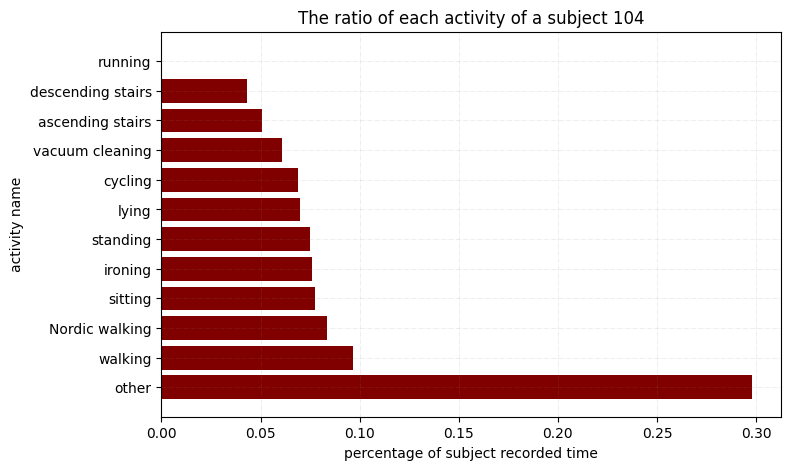

subject 105 dataframe details:


,timestamp,activityID,heart-rate,hand-temperature,hand-acc-x,hand-acc-y,hand-acc-z,hand-gyr-x,hand-gyr-y,hand-gyr-z,...,ankle-temperature,ankle-acc-x,ankle-acc-y,ankle-acc-z,ankle-gyr-x,ankle-gyr-y,ankle-gyr-z,ankle-mag-x,ankle-mag-y,ankle-mag-z
count,374783.000000,374783.000000,34223.000000,373242.000000,373242.000000,373242.000000,373242.000000,373242.000000,373242.000000,373242.000000,...,372803.000000,372803.000000,372803.000000,372803.000000,372803.000000,372803.000000,372803.000000,372803.000000,372803.000000,372803.000000
mean,1879.610000,5.874485,109.403354,34.727542,-4.335374,5.379049,3.375515,-0.005856,0.036000,0.022257,...,34.164012,9.752750,0.137256,-3.199852,0.014629,-0.040120,0.024625,-32.127083,2.280400,19.474495
std,1081.906773,6.360833,24.924682,0.489405,5.756766,5.896408,3.786620,1.293162,0.769686,1.384974,...,0.243200,5.807568,6.893323,3.343550,1.096377,0.623888,2.100005,14.785967,21.877278,15.931513
min,5.700000,0.000000,70.000000,33.750000,-90.760600,-65.538700,-38.907800,-27.804400,-7.428840,-14.264700,...,33.500000,-66.308500,-89.758600,-139.954000,-13.385600,-7.701040,-14.019600,-102.849000,-76.062800,-82.894900
25%,942.655000,0.000000,90.000000,34.437500,-8.642518,2.723425,1.329222,-0.448775,-0.212673,-0.403438,...,34.062500,8.895640,-2.061835,-4.040965,-0.219134,-0.237959,-0.643571,-41.822000,-12.235250,10.191800
50%,1879.610000,4.000000,106.000000,34.812500,-4.443575,4.549640,3.187260,-0.010997,0.009924,-0.002832,...,34.187500,9.518390,-0.293927,-2.996120,0.004134,-0.013551,-0.009224,-35.183500,3.001460,20.883900
75%,2816.565000,7.000000,123.000000,35.125000,0.004188,7.577165,6.025665,0.335213,0.270738,0.472700,...,34.375000,10.358850,1.318995,-1.920150,0.155405,0.084077,0.083281,-22.776850,20.501200,29.794200
max,3753.520000,24.000000,182.000000,35.500000,42.891600,154.576000,76.639600,26.415800,13.251000,14.338400,...,34.500000,154.168000,153.633000,156.730000,11.510900,6.002540,14.482700,70.941700,80.181400,104.832000


percentage of na values:


timestamp            0.000000
activityID           0.000000
heart-rate           0.908686
hand-temperature     0.004112
hand-acc-x           0.004112
hand-acc-y           0.004112
hand-acc-z           0.004112
hand-gyr-x           0.004112
hand-gyr-y           0.004112
hand-gyr-z           0.004112
hand-mag-x           0.004112
hand-mag-y           0.004112
hand-mag-z           0.004112
chest-temperature    0.000832
chest-acc-x          0.000832
chest-acc-y          0.000832
chest-acc-z          0.000832
chest-gyr-x          0.000832
chest-gyr-y          0.000832
chest-gyr-z          0.000832
chest-mag-x          0.000832
chest-mag-y          0.000832
chest-mag-z          0.000832
ankle-temperature    0.005283
ankle-acc-x          0.005283
ankle-acc-y          0.005283
ankle-acc-z          0.005283
ankle-gyr-x          0.005283
ankle-gyr-y          0.005283
ankle-gyr-z          0.005283
ankle-mag-x          0.005283
ankle-mag-y          0.005283
ankle-mag-z          0.005283
dtype: flo

activity histogram:


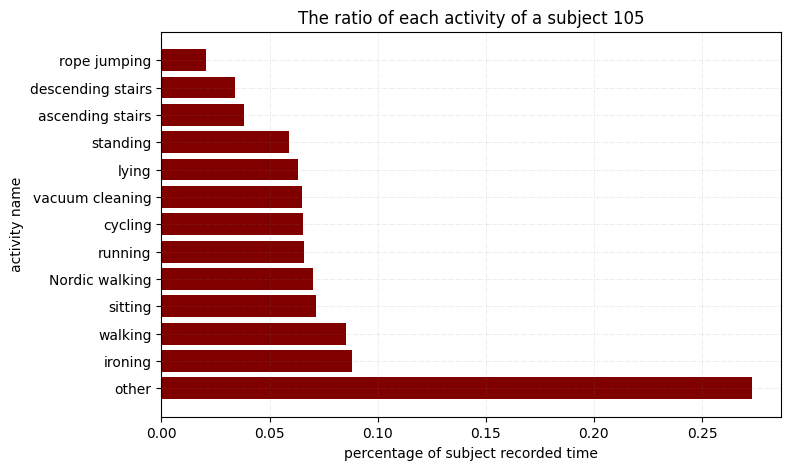

subject 106 dataframe details:


,timestamp,activityID,heart-rate,hand-temperature,hand-acc-x,hand-acc-y,hand-acc-z,hand-gyr-x,hand-gyr-y,hand-gyr-z,...,ankle-temperature,ankle-acc-x,ankle-acc-y,ankle-acc-z,ankle-gyr-x,ankle-gyr-y,ankle-gyr-z,ankle-mag-x,ankle-mag-y,ankle-mag-z
count,361817.000000,361817.000000,33049.000000,360796.000000,360796.000000,360796.000000,360796.000000,360796.000000,360796.000000,360796.000000,...,360445.000000,360445.000000,360445.000000,360445.000000,360445.000000,360445.000000,360445.000000,360445.000000,360445.000000,360445.000000
mean,1814.970000,5.417891,105.051257,32.241671,-5.277900,4.699936,3.378156,0.007675,0.041364,-0.002025,...,34.717302,9.533558,0.284635,-2.610255,0.008180,-0.033220,0.012977,-31.154582,0.245293,18.171673
std,1044.477155,5.996845,26.647474,2.039148,7.095599,8.099851,4.337503,1.389233,1.095666,1.608947,...,0.418222,5.935697,7.062712,3.711120,1.189130,0.459696,1.947164,13.860491,20.281803,18.867591
min,5.890000,0.000000,60.000000,27.937500,-145.367000,-55.446700,-101.452000,-14.731700,-7.401360,-12.827300,...,33.812500,-146.851000,-98.867100,-137.562000,-14.655000,-9.027570,-11.096200,-103.044000,-80.346600,-65.448000
25%,910.430000,0.000000,86.000000,30.687500,-8.990110,1.990215,0.987527,-0.399180,-0.226022,-0.299889,...,34.500000,9.007770,-1.422150,-3.508340,-0.195256,-0.081863,-0.476032,-39.764200,-11.361400,4.544860
50%,1814.970000,3.000000,98.000000,33.375000,-6.330995,3.667555,3.465740,-0.008428,0.004179,-0.005491,...,34.812500,9.574520,-0.259112,-2.615000,0.004188,-0.004221,-0.004550,-32.586900,-0.950521,17.281400
75%,2719.510000,7.000000,116.000000,33.687500,-0.746939,6.589070,6.327665,0.317411,0.248541,0.316134,...,35.062500,10.032500,1.348290,-1.470280,0.093991,0.069412,0.059427,-21.338600,16.846900,34.026900
max,3624.050000,24.000000,176.000000,34.187500,60.912600,155.699000,156.949000,23.865200,14.133700,11.641100,...,35.250000,154.643000,150.183000,113.568000,12.628500,11.754600,9.714560,80.127100,90.038600,110.209000


percentage of na values:


timestamp            0.000000
activityID           0.000000
heart-rate           0.908658
hand-temperature     0.002822
hand-acc-x           0.002822
hand-acc-y           0.002822
hand-acc-z           0.002822
hand-gyr-x           0.002822
hand-gyr-y           0.002822
hand-gyr-z           0.002822
hand-mag-x           0.002822
hand-mag-y           0.002822
hand-mag-z           0.002822
chest-temperature    0.000948
chest-acc-x          0.000948
chest-acc-y          0.000948
chest-acc-z          0.000948
chest-gyr-x          0.000948
chest-gyr-y          0.000948
chest-gyr-z          0.000948
chest-mag-x          0.000948
chest-mag-y          0.000948
chest-mag-z          0.000948
ankle-temperature    0.003792
ankle-acc-x          0.003792
ankle-acc-y          0.003792
ankle-acc-z          0.003792
ankle-gyr-x          0.003792
ankle-gyr-y          0.003792
ankle-gyr-z          0.003792
ankle-mag-x          0.003792
ankle-mag-y          0.003792
ankle-mag-z          0.003792
dtype: flo

activity histogram:


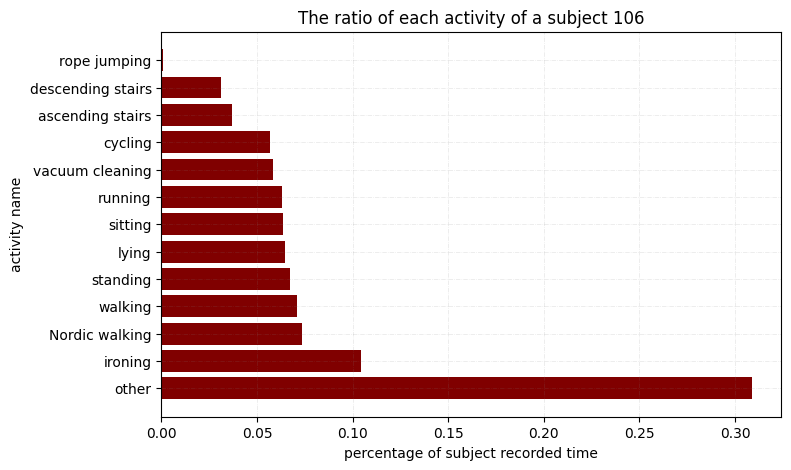

subject 107 dataframe details:


,timestamp,activityID,heart-rate,hand-temperature,hand-acc-x,hand-acc-y,hand-acc-z,hand-gyr-x,hand-gyr-y,hand-gyr-z,...,ankle-temperature,ankle-acc-x,ankle-acc-y,ankle-acc-z,ankle-gyr-x,ankle-gyr-y,ankle-gyr-z,ankle-mag-x,ankle-mag-y,ankle-mag-z
count,313599.000000,313599.000000,28646.000000,312093.000000,312093.000000,312093.000000,312093.000000,312093.000000,312093.000000,312093.000000,...,312562.000000,312562.000000,312562.000000,312562.000000,312562.000000,312562.000000,312562.000000,312562.000000,312562.000000,312562.000000
mean,1573.910000,5.825988,96.510542,32.942709,-5.722062,4.279513,3.434817,-0.008175,0.011739,0.007411,...,32.200806,9.311826,-0.229623,-3.588015,0.018150,-0.055600,-0.003974,-27.790415,-0.301571,19.285376
std,905.283779,5.940061,22.203353,1.033476,4.658865,4.774483,3.617698,0.878371,0.517566,1.043086,...,0.760914,6.076899,7.364409,3.445142,1.157082,0.678250,1.829038,17.619197,19.821234,19.106832
min,5.920000,0.000000,60.000000,29.187500,-68.695800,-63.792800,-26.229900,-13.780000,-8.295970,-7.688460,...,29.125000,-64.818100,-155.256000,-137.354000,-10.152500,-5.001890,-10.270900,-111.234000,-81.404600,-82.889600
25%,789.915000,0.000000,78.000000,32.812500,-9.235270,2.338690,0.972337,-0.242647,-0.146236,-0.233531,...,32.000000,9.013360,-1.480780,-4.439070,-0.234765,-0.052061,-0.453179,-39.446200,-11.620500,5.711093
50%,1573.910000,4.000000,95.000000,33.062500,-6.748670,3.523210,2.426190,-0.002498,0.003057,-0.005872,...,32.375000,9.374760,-0.377553,-3.549255,0.004621,-0.001654,-0.005274,-29.522300,-1.764335,15.038600
75%,2357.905000,12.000000,114.000000,33.687500,-1.898720,5.860920,6.897210,0.206944,0.166915,0.214001,...,32.687500,9.957387,0.696329,-2.455742,0.091545,0.157764,0.045913,-12.826350,14.720025,34.453575
max,3141.900000,17.000000,152.000000,34.250000,47.631400,155.257000,67.009500,16.395100,6.687870,7.013280,...,33.187500,157.232000,134.938000,151.510000,10.492300,3.527870,8.775450,85.172400,96.682400,96.234400


percentage of na values:


timestamp            0.000000
activityID           0.000000
heart-rate           0.908654
hand-temperature     0.004802
hand-acc-x           0.004802
hand-acc-y           0.004802
hand-acc-z           0.004802
hand-gyr-x           0.004802
hand-gyr-y           0.004802
hand-gyr-z           0.004802
hand-mag-x           0.004802
hand-mag-y           0.004802
hand-mag-z           0.004802
chest-temperature    0.000820
chest-acc-x          0.000820
chest-acc-y          0.000820
chest-acc-z          0.000820
chest-gyr-x          0.000820
chest-gyr-y          0.000820
chest-gyr-z          0.000820
chest-mag-x          0.000820
chest-mag-y          0.000820
chest-mag-z          0.000820
ankle-temperature    0.003307
ankle-acc-x          0.003307
ankle-acc-y          0.003307
ankle-acc-z          0.003307
ankle-gyr-x          0.003307
ankle-gyr-y          0.003307
ankle-gyr-z          0.003307
ankle-mag-x          0.003307
ankle-mag-y          0.003307
ankle-mag-z          0.003307
dtype: flo

activity histogram:


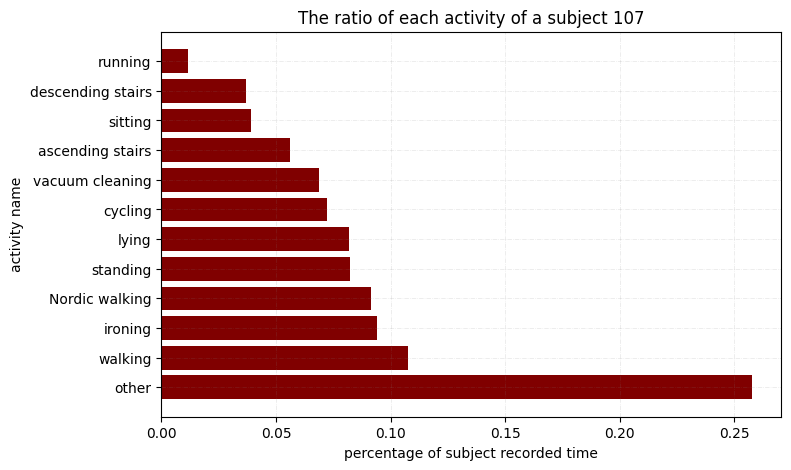

subject 108 dataframe details:


,timestamp,activityID,heart-rate,hand-temperature,hand-acc-x,hand-acc-y,hand-acc-z,hand-gyr-x,hand-gyr-y,hand-gyr-z,...,ankle-temperature,ankle-acc-x,ankle-acc-y,ankle-acc-z,ankle-gyr-x,ankle-gyr-y,ankle-gyr-z,ankle-mag-x,ankle-mag-y,ankle-mag-z
count,408031.000000,408031.000000,37179.000000,405880.000000,405880.000000,405880.000000,405880.000000,405880.000000,405880.000000,405880.000000,...,406080.000000,406080.000000,406080.000000,406080.000000,406080.000000,406080.000000,406080.000000,406080.000000,406080.000000,406080.000000
mean,2046.040000,5.234666,115.253234,32.971459,-5.384200,-4.169108,3.082906,-0.062992,0.059203,-0.033711,...,33.206863,9.537535,-0.824540,-3.281828,0.038543,-0.019731,-0.018394,-30.053008,10.135238,15.238070
std,1177.885482,6.368952,30.757093,1.617991,6.270890,5.924233,3.445358,1.307926,0.908610,1.524781,...,1.148212,6.596850,7.062641,3.628688,1.127744,0.764149,1.959380,14.247067,19.046270,17.114419
min,5.890000,0.000000,66.000000,30.562500,-106.527000,-104.301000,-55.963700,-20.965600,-13.390400,-15.218500,...,31.062500,-155.068000,-157.443000,-157.245000,-23.995000,-18.126900,-11.651900,-113.624000,-63.884200,-83.799400
25%,1025.965000,0.000000,91.000000,30.875000,-9.421582,-6.816100,0.867816,-0.314481,-0.167236,-0.268129,...,31.812500,8.920235,-1.564182,-4.203730,-0.047154,-0.050963,-0.037195,-40.355300,-2.511130,2.183210
50%,2046.040000,3.000000,115.000000,33.687500,-6.244030,-2.863665,2.591190,-0.010368,0.003951,-0.006765,...,33.500000,9.346635,-0.274175,-3.016290,0.014419,0.001051,0.009395,-31.263400,12.539100,16.299600
75%,3066.115000,7.000000,128.000000,34.437500,-1.510340,-1.295555,6.141882,0.259672,0.206406,0.246119,...,34.187500,9.901363,1.332923,-2.161212,0.252508,0.119792,0.292884,-18.804700,21.677550,25.720600
max,4086.190000,24.000000,202.000000,34.812500,46.741800,62.033900,116.977000,19.601400,10.432100,14.309000,...,34.812500,157.040000,157.293000,158.872000,17.420400,13.588200,16.528800,71.494600,82.544100,105.941000


percentage of na values:


timestamp            0.000000
activityID           0.000000
heart-rate           0.908882
hand-temperature     0.005272
hand-acc-x           0.005272
hand-acc-y           0.005272
hand-acc-z           0.005272
hand-gyr-x           0.005272
hand-gyr-y           0.005272
hand-gyr-z           0.005272
hand-mag-x           0.005272
hand-mag-y           0.005272
hand-mag-z           0.005272
chest-temperature    0.003206
chest-acc-x          0.003206
chest-acc-y          0.003206
chest-acc-z          0.003206
chest-gyr-x          0.003206
chest-gyr-y          0.003206
chest-gyr-z          0.003206
chest-mag-x          0.003206
chest-mag-y          0.003206
chest-mag-z          0.003206
ankle-temperature    0.004781
ankle-acc-x          0.004781
ankle-acc-y          0.004781
ankle-acc-z          0.004781
ankle-gyr-x          0.004781
ankle-gyr-y          0.004781
ankle-gyr-z          0.004781
ankle-mag-x          0.004781
ankle-mag-y          0.004781
ankle-mag-z          0.004781
dtype: flo

activity histogram:


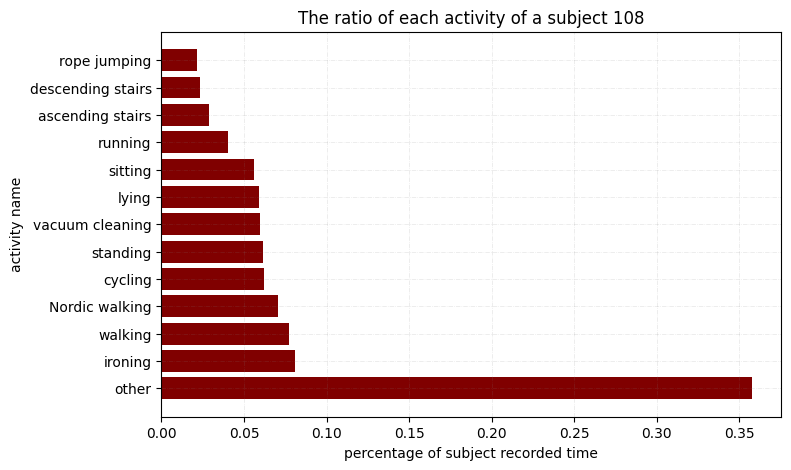

subject 109 dataframe details:


,timestamp,activityID,heart-rate,hand-temperature,hand-acc-x,hand-acc-y,hand-acc-z,hand-gyr-x,hand-gyr-y,hand-gyr-z,...,ankle-temperature,ankle-acc-x,ankle-acc-y,ankle-acc-z,ankle-gyr-x,ankle-gyr-y,ankle-gyr-z,ankle-mag-x,ankle-mag-y,ankle-mag-z
count,8477.000000,8477.000000,776.000000,8474.000000,8474.000000,8474.000000,8474.000000,8474.000000,8474.000000,8474.000000,...,8468.000000,8468.000000,8468.000000,8468.000000,8468.000000,8468.000000,8468.000000,8468.000000,8468.000000,8468.000000
mean,57.850000,18.094137,147.740979,25.017554,-2.278159,7.992721,-0.326956,0.230890,0.024984,0.062659,...,31.395231,9.822443,0.918866,-3.275774,-0.011161,-0.041513,0.009701,-37.270947,-17.006554,9.993259
std,24.472434,10.337993,7.799664,0.115618,6.146012,11.159546,5.926775,1.866167,1.854194,2.001904,...,0.086898,12.865949,11.825007,9.407364,1.725868,0.967485,2.034075,7.203337,16.257600,7.096208
min,15.470000,0.000000,138.000000,24.750000,-69.717600,-81.681200,-38.042400,-28.135400,-17.849500,-9.773900,...,31.187500,-127.849000,-157.615000,-109.686000,-11.940400,-8.849780,-7.271180,-47.390700,-42.370100,-22.381700
25%,36.660000,24.000000,141.000000,24.937500,-6.279738,0.477708,-3.721697,-0.848451,-1.015518,-1.217725,...,31.312500,3.102960,-2.434350,-4.840433,-0.746524,-0.537460,-0.910230,-43.341225,-28.139325,6.771300
50%,57.850000,24.000000,146.000000,25.062500,-2.116955,6.168840,0.492557,0.205404,0.105704,0.138294,...,31.437500,9.345955,-0.212124,-2.416595,0.000788,-0.013778,0.007605,-38.001200,-22.101350,10.499150
75%,79.040000,24.000000,153.000000,25.125000,1.297127,13.576950,3.243082,1.395890,1.287325,1.427043,...,31.437500,13.364725,4.479093,0.689291,0.693021,0.469633,0.991644,-33.258125,-9.205520,13.775950
max,100.230000,24.000000,162.000000,25.187500,16.909200,65.430400,157.760000,21.640500,23.077900,6.954030,...,31.500000,156.671000,156.114000,160.516000,9.563010,4.356320,12.870400,-2.950730,45.144000,31.049500


percentage of na values:


timestamp            0.000000
activityID           0.000000
heart-rate           0.908458
hand-temperature     0.000354
hand-acc-x           0.000354
hand-acc-y           0.000354
hand-acc-z           0.000354
hand-gyr-x           0.000354
hand-gyr-y           0.000354
hand-gyr-z           0.000354
hand-mag-x           0.000354
hand-mag-y           0.000354
hand-mag-z           0.000354
chest-temperature    0.006016
chest-acc-x          0.006016
chest-acc-y          0.006016
chest-acc-z          0.006016
chest-gyr-x          0.006016
chest-gyr-y          0.006016
chest-gyr-z          0.006016
chest-mag-x          0.006016
chest-mag-y          0.006016
chest-mag-z          0.006016
ankle-temperature    0.001062
ankle-acc-x          0.001062
ankle-acc-y          0.001062
ankle-acc-z          0.001062
ankle-gyr-x          0.001062
ankle-gyr-y          0.001062
ankle-gyr-z          0.001062
ankle-mag-x          0.001062
ankle-mag-y          0.001062
ankle-mag-z          0.001062
dtype: flo

activity histogram:


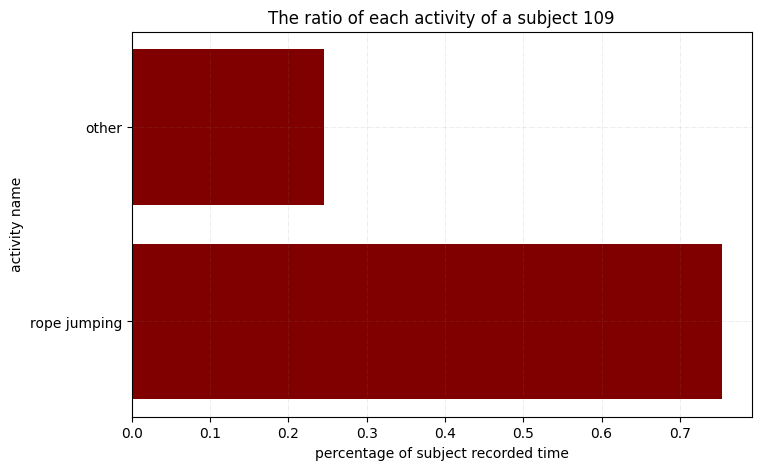

In [127]:
for subject in subjects_data.keys():
    print(f'subject {subject} dataframe details:')
    df = subjects_data[subject]
    display(df.describe())
    print('percentage of na values:')
    display(df.isna().mean())
    print('activity histogram:')
    barh_plot_activity(df,subject)

In [224]:
def plot_ts(df):
    fig, ax = plt.subplots(len(df.columns[2:]), 1, figsize=(14,50), sharex=True)
    i = 0
    for col in df.columns[2:]:
        ax[i].plot(df['timestamp'], df[col], color='r', alpha=0.5)
        ax[i].set_title(col)
        ax[i].grid(visible = True, color ='grey',linestyle ='-.', linewidth = 0.5,alpha = 0.2)
        i+=1
    plt.show()

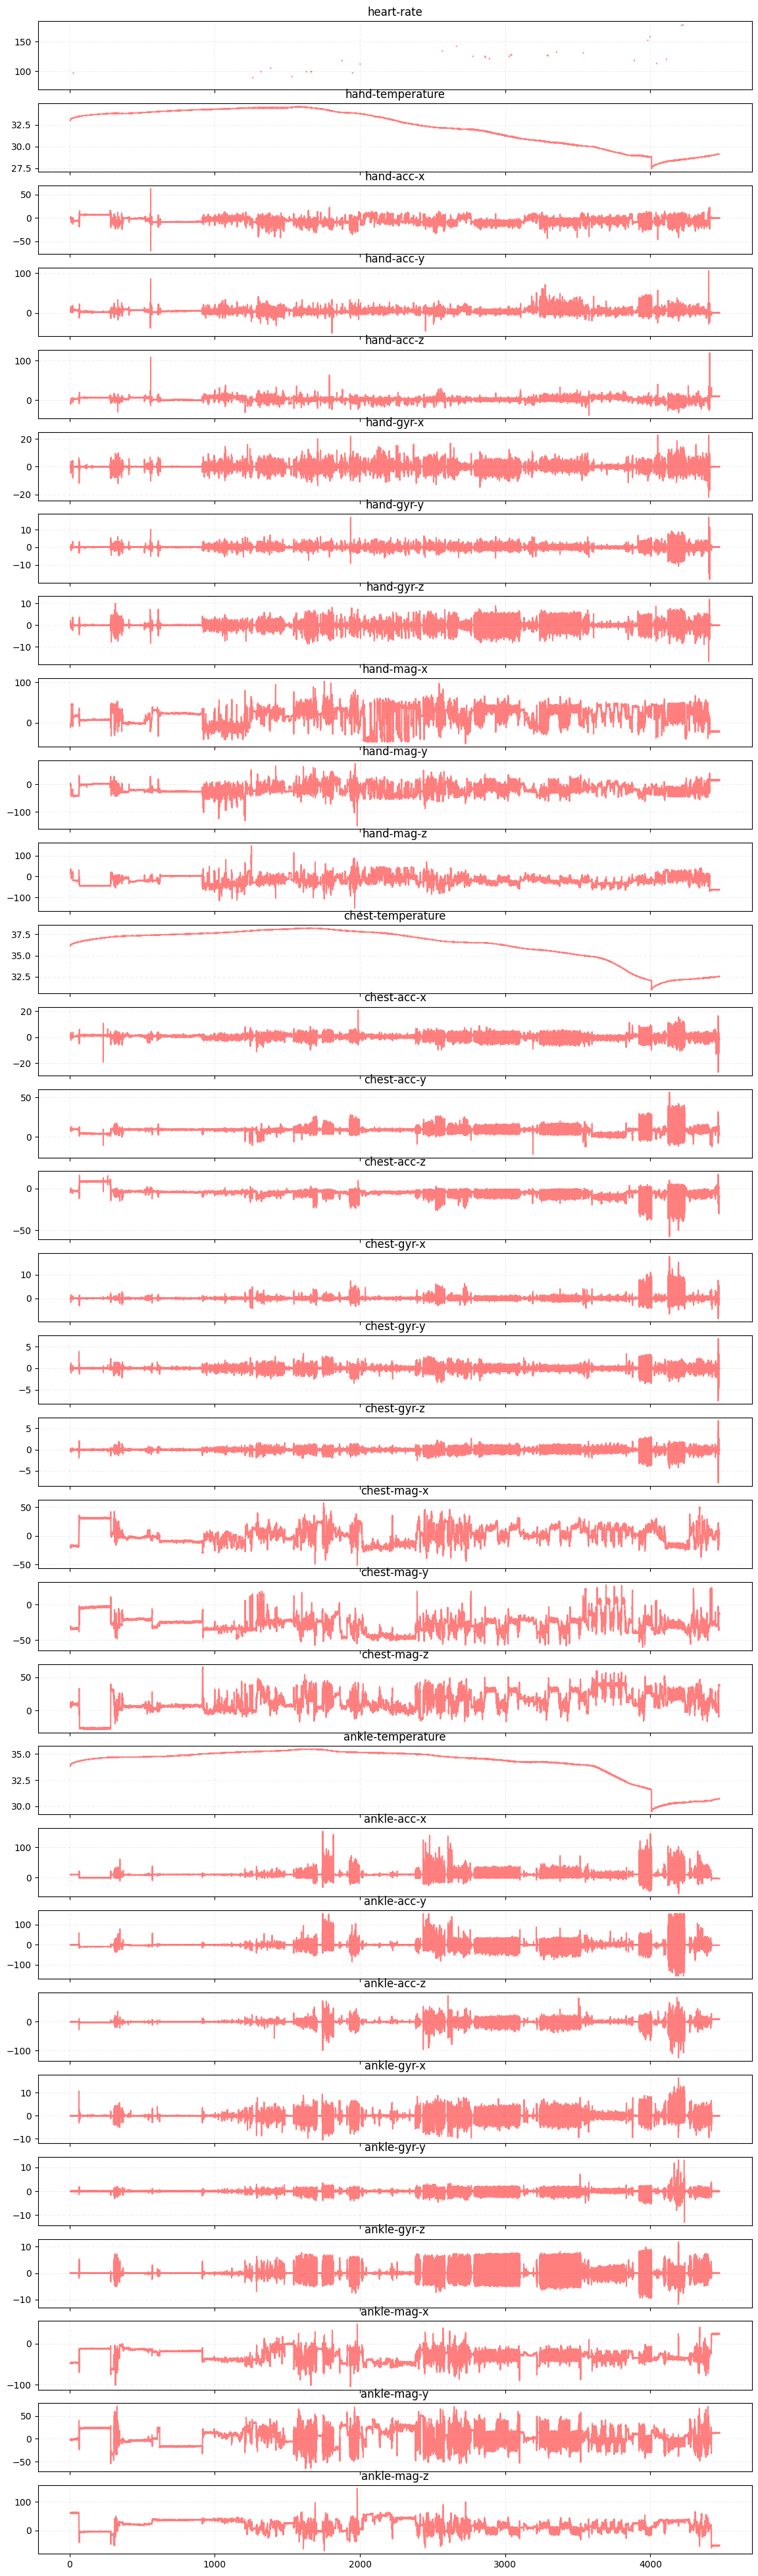

In [227]:
plot_ts(subjects_data[102])

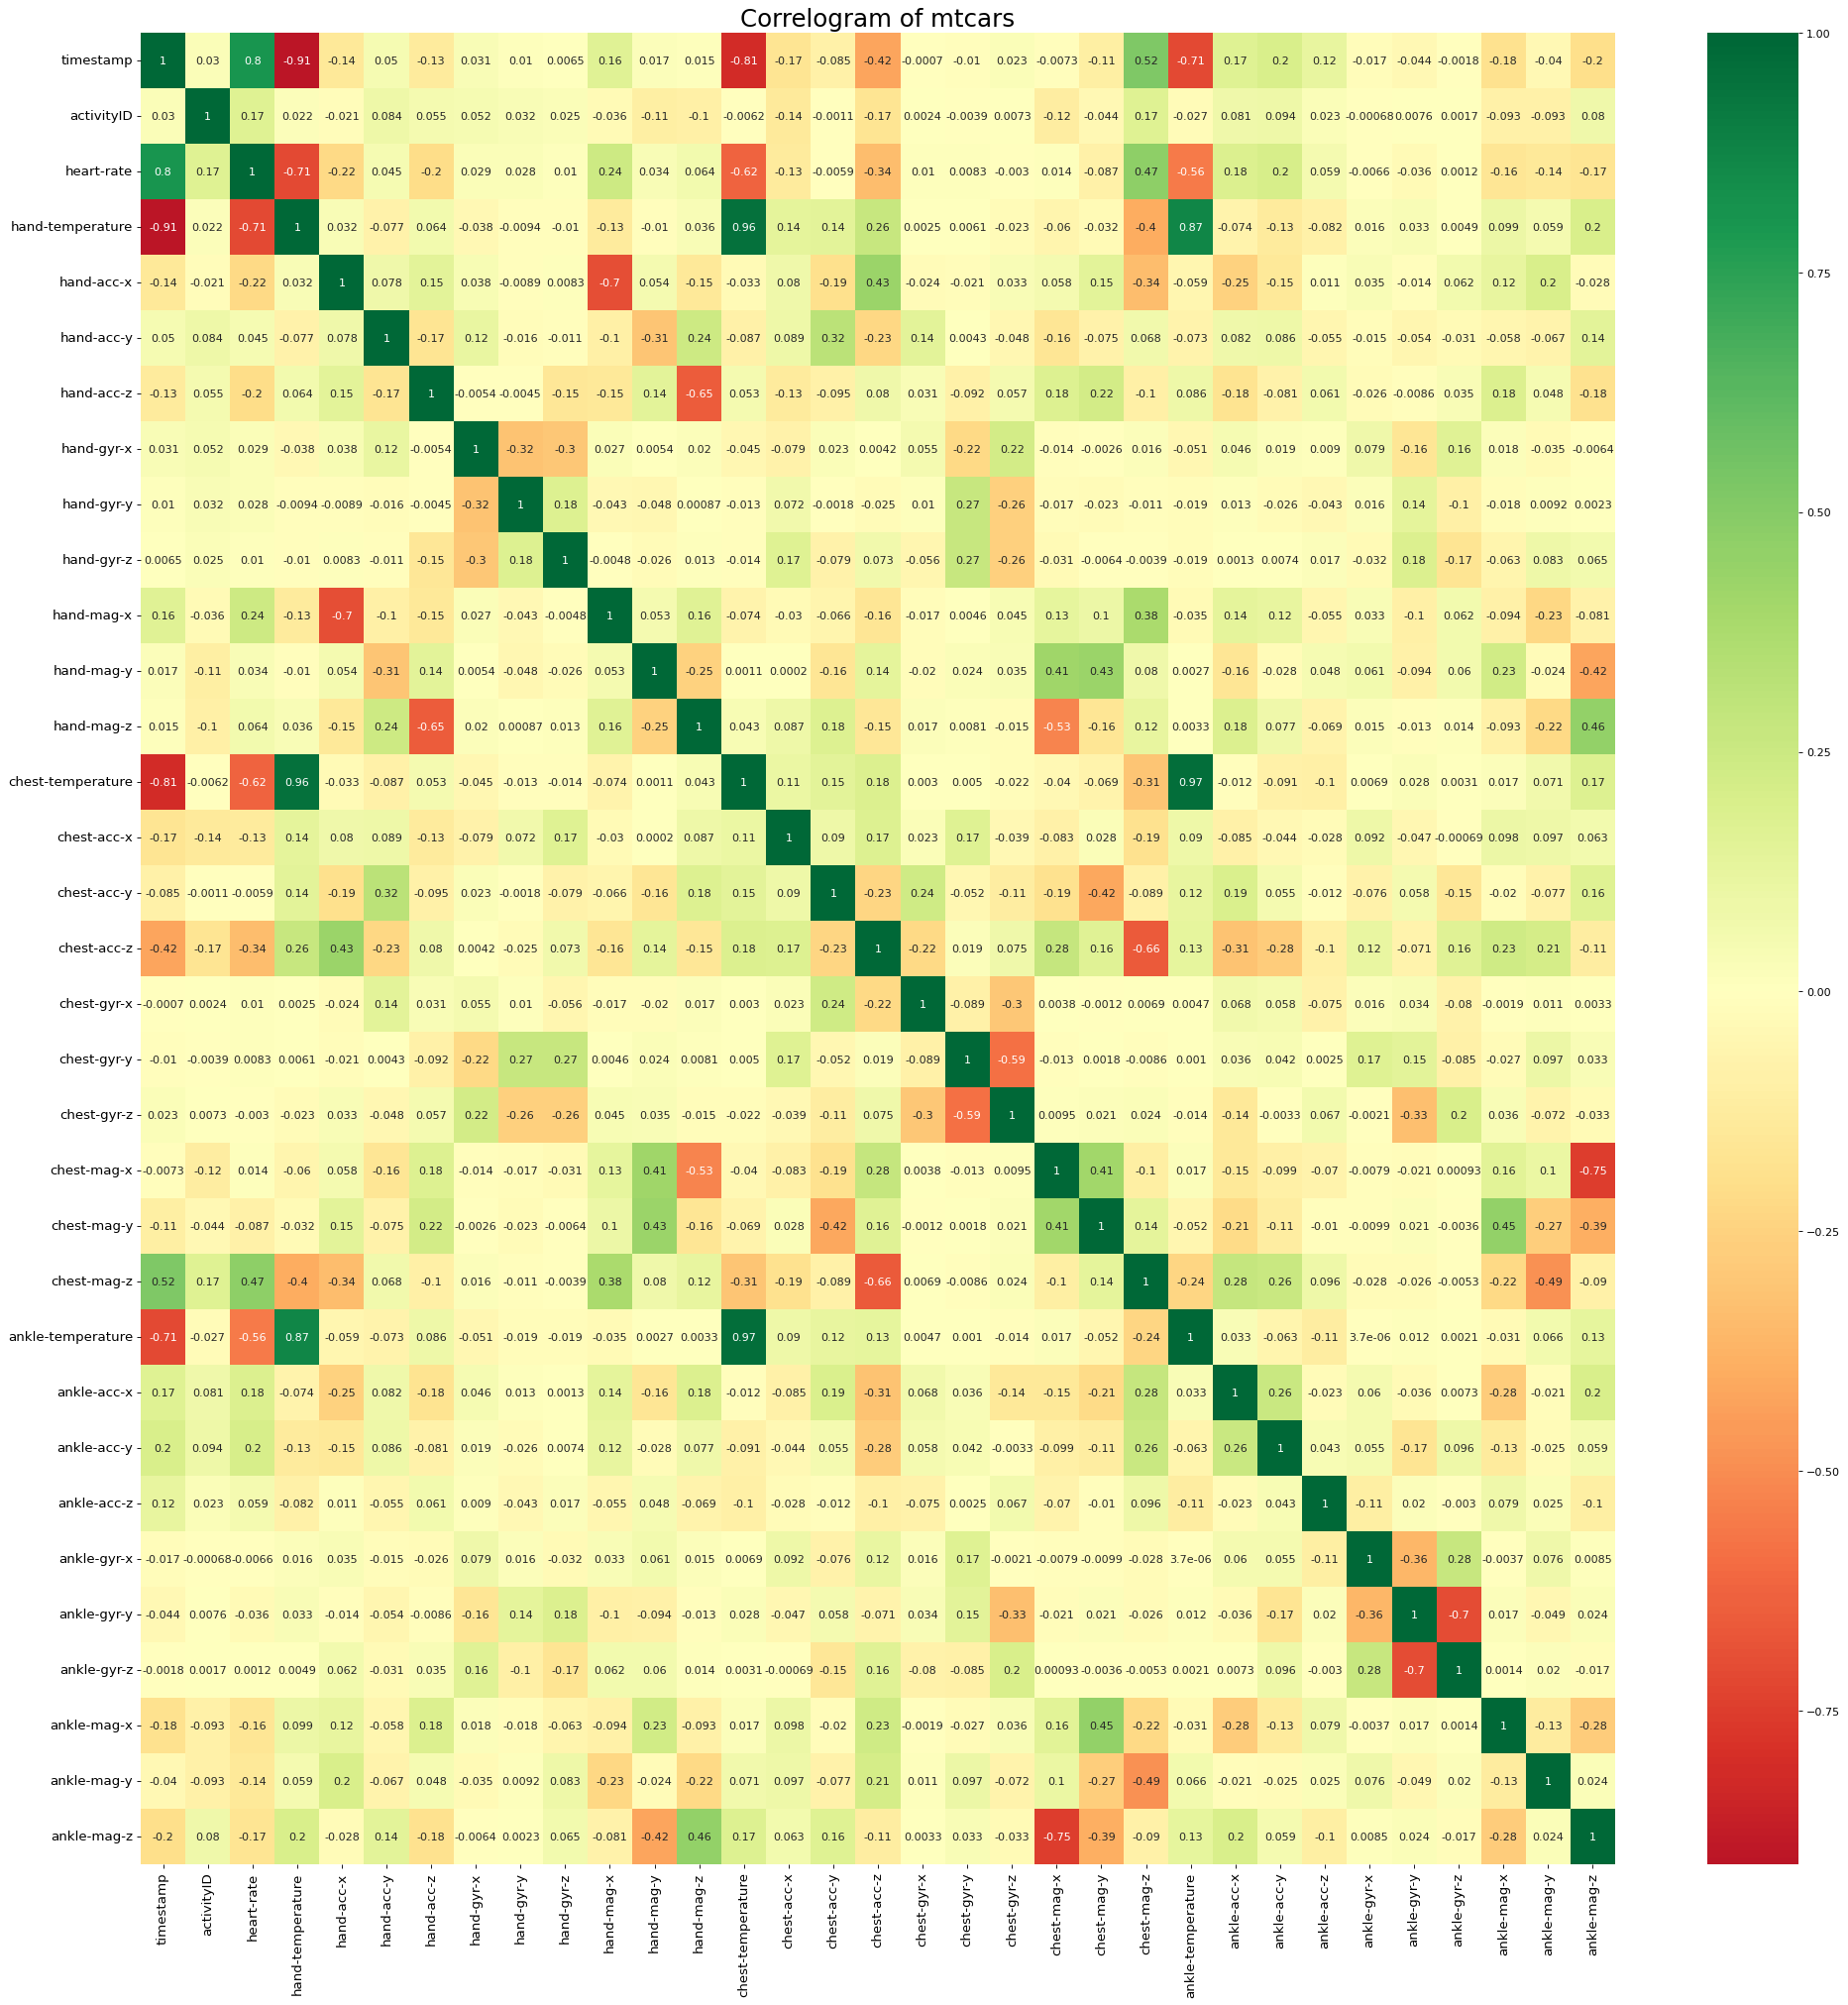

In [19]:

# Plot
plt.figure(figsize=(30,30), dpi= 80)
sns.heatmap(df_2.corr(), xticklabels=df_2.corr().columns, yticklabels=df_2.corr().columns, cmap='RdYlGn', center=0, annot=True)

# Decorations
plt.title('Correlogram of mtcars', fontsize=22)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()